In [2]:
#Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


In [32]:
#mengambil dan membaca dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')
datbank = pd.DataFrame(df)

In [33]:
#menampilkan 5 record teratas
datbank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [34]:
#menampilkan 5 record terbawah
datbank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [35]:
#melihat berapa banyak entri pada dataset
datbank.shape

(41188, 21)

In [36]:
#melihat list kolom
datbank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [37]:
#melihat informasi mengenai struktur dataframe
datbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [38]:
#melihat ringkasan singkat dari setiap kolom dalam dataset
datbank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [39]:
#Mencari nilai unique pada data
for i in datbank.columns:
    print("\n", i)
    print(datbank[i].unique())


 age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

 job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

 marital
['married' 'single' 'divorced' 'unknown']

 education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

 default
['no' 'unknown' 'yes']

 housing
['no' 'yes' 'unknown']

 loan
['no' 'yes' 'unknown']

 contact
['telephone' 'cellular']

 month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

 day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']

 duration
[ 261  149  226 ... 1246 1556 1868]

 campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37

In [40]:
#memeriksa berapa banyak objek null yang dimiliki
datbank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [41]:
#memeriksa data yang duplikat pada dataframe
datbank.duplicated().sum()

12

In [42]:
#menghapus data yang duplikat
datbank.drop_duplicates(inplace=True)

In [94]:
#membuat var kategori untuk menampung data dengantipe data object dan boolean
kategori = datbank.select_dtypes(include=['object', 'bool']).columns.values

for col in kategori:
    print(col, "(", len(datbank[col].unique()) , "values):\n", np.sort(datbank[col].unique()))

DATA VISUALIZATION

In [95]:
#Membuat barplot untuk variabel kategoris
for col in kategori:
    plt.figure(figsize=(10,5))    
    sns.barplot(datbank[col].value_counts().values, datbank[col].value_counts().index, datbank=df)    
    plt.title(col)    
    plt.tight_layout()

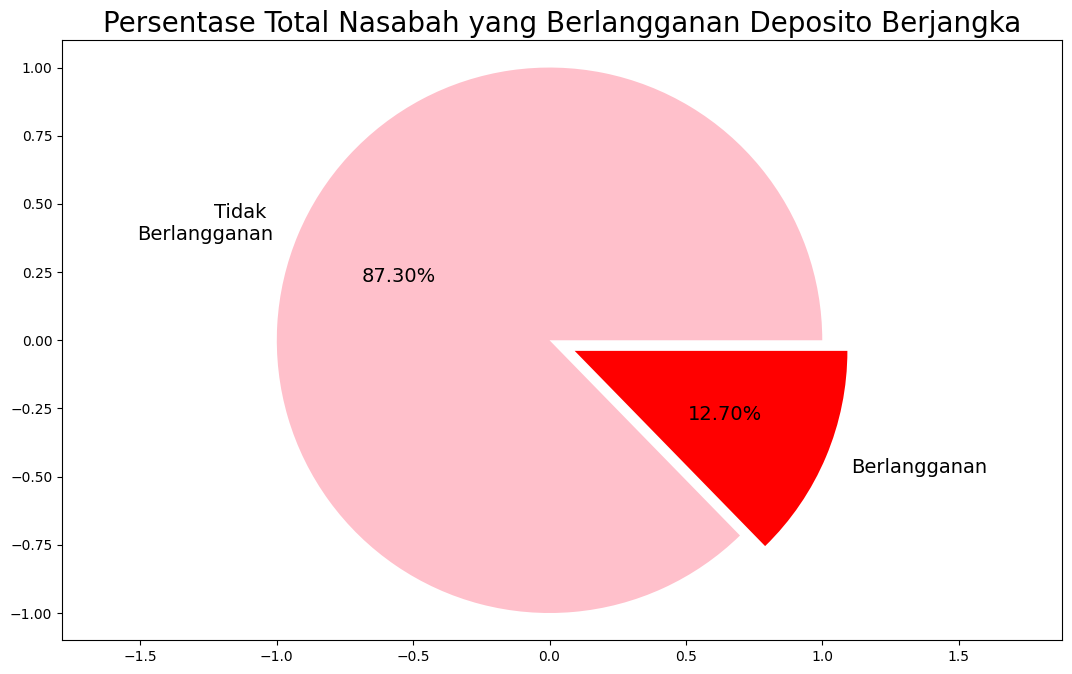

In [87]:
#membuat pie chart untuk nasabah yang berlangganan deposito berjangka
# Membuat pie chart untuk nasabah yang berlangganan deposito berjangka
mylabels = ["Tidak \nBerlangganan", "Berlangganan"]
mycolors = ["pink", "red"]
explode = (0, 0.1)
fig = plt.figure(figsize=(10,6)) 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(datbank['y'].value_counts(), 
       labels = mylabels,
       colors = mycolors,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=14)) 

ax.axis('equal') 
plt.title('Persentase Total Nasabah yang Berlangganan Deposito Berjangka',
     color = 'black',
     fontsize = 20
     )

plt.show()

Dapat dilihat bahwa presentase nasabah yang tidak berlangganan deposito berjangka lebih banyak yaitu sebesar 88.73% dibandingkan dengan yang berlangganan hanya sebesar 11.27%.

In [51]:
#membuat definisi cross_teb untuk EDA
def cross_tab(datbank,f1,f2):
    jobs=list(datbank[f1].unique())
    edu=list(datbank[f2].unique())
    dataframes=[]
    for i in edu:
        datbank_i=datbank[datbank[f2]==i]
        datbank_i_job=datbank_i.groupby(f1).count()[f2]
        dataframes.append(datbank_i_job)
    new_cross=pd.concat(dataframes,axis=1)
    new_cross.columns=edu
    new_cross=new_cross.fillna(0)
    return new_cross

In [52]:
#Melihat cross_tab untuk variabel job dan education
cross_tab(datbank,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77,3329,151,499,363,249,5750,1.0
blue-collar,2318,878,1425,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,97,284,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2680,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0


In [53]:
#Mengisi data 'unknown' dengan data yang relevan
datbank.loc[(datbank['age']>60) & (datbank['job']=='unknown'), 'job'] = 'retired'
datbank.loc[(datbank['education']=='unknown') & (datbank['job']=='management'), 'education'] = 'university.degree'
datbank.loc[(datbank['education']=='unknown') & (datbank['job']=='services'), 'education'] = 'high.school'
datbank.loc[(datbank['education']=='unknown') & (datbank['job']=='housemaid'), 'education'] = 'basic.4y'
datbank.loc[(datbank['job'] == 'unknown') & (datbank['education']=='basic.4y'), 'job'] = 'blue-collar'
datbank.loc[(datbank['job'] == 'unknown') & (datbank['education']=='basic.6y'), 'job'] = 'blue-collar'
datbank.loc[(datbank['job'] == 'unknown') & (datbank['education']=='basic.9y'), 'job'] = 'blue-collar'
datbank.loc[(datbank['job']=='unknown') & (datbank['education']=='professional.course'), 'job'] = 'technician'

In [54]:
#Melihat cross_tab untuk variabel job dan education
cross_tab(datbank,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77.0,3329,151.0,499.0,363.0,249.0,5750,1.0
blue-collar,2366.0,878,1447.0,3654.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,111.0,285,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2830,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0


In [56]:
#Melihat cross_tab untuk variabel job dan housing
cross_tab(datbank,'job','housing')

,no,yes,unknown
job,,,
admin.,4634,5558,227
blue-collar,4361,4752,241
entrepreneur,641,779,36
housemaid,491,540,29
management,1363,1490,71
retired,787,908,44
self-employed,641,740,40
services,1817,2049,101
student,381,471,23


Dikarenakan data diatas terlalu banyak yang unkown, maka akan lebih baik data tersebut tidak diikut sertakan.

In [57]:
#Tidak mengikutsertakan data yang bernilai unknown
datbank = datbank[datbank.housing != 'unknown']
datbank = datbank[datbank.loan != 'unknown']
datbank = datbank[datbank.default != 'unknown']
databank = datbank[datbank.job != 'unknown']
datbank = datbank[datbank.marital != 'unknown']
datbank = datbank[datbank.education != 'unknown']

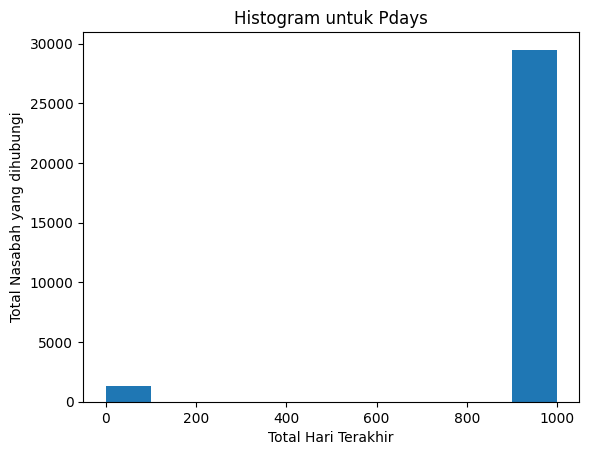

In [58]:
#Membuat histogram untuk pdays
plt.hist(datbank['pdays'])
plt.title('Histogram untuk Pdays')
plt.xlabel('Total Hari Terakhir')
plt.ylabel('Total Nasabah yang dihubungi')
plt.show()

Berdasarkan hasil histogram di atas, ada yang janggal dengan total hari terakhir untuk menghubungi nasabah. Dari keterangan di atas, nilai 999 berarti nasabah sebelumnya tidak dihubungi. Maka dari itu, nilai tersebut diubah menjadi variabel kategori

In [60]:
#
datbank['pdays_missing'] = 0
datbank['pdays_less_5'] = 0
datbank['pdays_greater_15'] = 0
datbank['pdays_bet_5_15'] = 0
datbank['pdays_missing'][df['pdays']==999] = 1
datbank['pdays_less_5'][df['pdays']<5] = 1
datbank['pdays_greater_15'][(df['pdays']>15) & (df['pdays']<999)] = 1
datbank['pdays_bet_5_15'][(df['pdays']>=5)&(df['pdays']<=15)]= 1

C:\Users\USER\AppData\Local\Temp\ipykernel_16208\3295974339.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datbank['pdays_missing'][df['pdays']==999] = 1
C:\Users\USER\AppData\Local\Temp\ipykernel_16208\3295974339.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datbank['pdays_less_5'][df['pdays']<5] = 1
C:\Users\USER\AppData\Local\Temp\ipykernel_16208\3295974339.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datbank['pday

ENCODE DATA

In [61]:
#Encode variabel kategori dengan encoder label
kategoris = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
label_encoder = LabelEncoder()
for cols in kategoris:
    datbank[cols] = label_encoder.fit_transform(datbank[cols])
datbank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,56,3,1,0,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
2,37,7,1,3,0,1,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
3,40,0,1,1,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
4,56,7,1,3,0,0,1,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
6,59,0,1,5,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0


DEFINING MODEL

In [63]:
train,test = train_test_split(datbank,test_size = 0.30 ,random_state = 350)
    
#Memisahkan variabel dependen dan independen pada data training dan testing
X_train = train.drop(labels='y',axis=1)
y_train = train['y']
X_test  = test.drop(labels='y',axis=1)
y_test  = test['y']


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

DATA MODELING

LOGISTIC REGRESSION

In [64]:
#Membuat model logistic regression
logreg = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=50)
logreg.fit(X_train, y_train)

#Menguji dataset
X_test = scaler.transform(X_test)

#Memprediksi output
y_pred = logreg.predict(X_test)

# summary model
print('\n\n')
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.92      0.97      0.94      8056
           1       0.66      0.42      0.51      1192

    accuracy                           0.90      9248
   macro avg       0.79      0.69      0.73      9248
weighted avg       0.89      0.90      0.89      9248



In [65]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7796  260]
 [ 691  501]]


In [66]:
#Akurasi dari Logistic Regression
print('Akurasi untuk Logistic Regression:', logreg.score(X_test, y_test))

Akurasi untuk Logistic Regression: 0.897166955017301


K-NEAREST NEIGHBORS

In [67]:
#Membuat model K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=50)

# Train model menggunakan training set
knn.fit(X_train, y_train)

# Memprediksi respon/output
y_pred1 = knn.predict(X_test)

In [68]:
#Confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[7888  168]
 [ 864  328]]


In [69]:
#Akurasi dari K-Nearest Neighbors
print("Akurasi untuk K-Nearest Neighbors:",metrics.accuracy_score(y_test, y_pred1))

Akurasi untuk K-Nearest Neighbors: 0.8884083044982699


SUPPORT VECTOR MACHINE

In [70]:
# Create a svm Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
svm_model.fit(X_train, y_train) 

# Predict the response for test dataset
y_pred2 = svm_model.predict(X_test)

In [71]:
#Confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[7851  205]
 [ 813  379]]


In [72]:
#Akurasi dari Support Vector Machine
print("Akurasi untuk Support Vector Machine:", metrics.accuracy_score(y_test, y_pred2))

Akurasi untuk Support Vector Machine: 0.8899221453287197


DECISION TREE CLASSIFIER

In [73]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

# Predict the response for test dataset
y_pred3 = dtc.predict(X_test)

In [74]:
#Confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

[[7448  608]
 [ 370  822]]


In [75]:
#Akurasi dari Decision Tree
print("Akurasi untuk Decision Tree:",metrics.accuracy_score(y_test, y_pred3))

Akurasi untuk Decision Tree: 0.8942474048442907


RANDOM FOREST CLASSIFIER

In [77]:
#Membuat model Random Forest
rfc = RandomForestClassifier(n_estimators=100)
 
# Train the model using the training
rfc.fit(X_train,y_train) 

y_pred4 = rfc.predict(X_test)

In [78]:
#Confusion Matrix
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)

[[7745  311]
 [ 581  611]]


In [79]:
#Akurasi untuk Random Forest
print("Akurasi untuk Random Forest:",metrics.accuracy_score(y_test, y_pred4))

Akurasi untuk Random Forest: 0.9035467128027682


NAIVE BAYES

In [80]:
# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred5 = gnb.predict(X_test)

In [81]:
#Confusion Matrix
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)

[[5324 2732]
 [ 137 1055]]


In [82]:
#Akurasi dari Naive Bayes
print("Akurasi untuk Naive Bayes:",metrics.accuracy_score(y_test, y_pred5))

Akurasi untuk Naive Bayes: 0.6897707612456747


MODEL EVALUATION

In [83]:
#Kumpulan akurasi:
print("Berikut adalah akurasi dari berbagai macam model:")
print("Logistic Regression:",metrics.accuracy_score(y_test, y_pred))
print("K-Nearest Neighbors:",metrics.accuracy_score(y_test, y_pred1))
print("Support Vector Machine:",metrics.accuracy_score(y_test, y_pred2))
print("Decision Tree:",metrics.accuracy_score(y_test, y_pred3))
print("Random Forest:",metrics.accuracy_score(y_test, y_pred4))
print("Naive Bayes:",metrics.accuracy_score(y_test, y_pred5))

Berikut adalah akurasi dari berbagai macam model:
Logistic Regression: 0.897166955017301
K-Nearest Neighbors: 0.8884083044982699
Support Vector Machine: 0.8899221453287197
Decision Tree: 0.8942474048442907
Random Forest: 0.9035467128027682
Naive Bayes: 0.6897707612456747


kesimpulannya bahwa berdasarkan hasil analisis diatas dapat dilihat bahwa Random Forest memiliki tingkat akurasi yang paling tinggi dibandingkan yang lain. dengan demikian maka random forest sangat tepat jika digunakan untuk memprediksi data ini.